In [2]:
from google.colab import drive
drive.mount('/content/drive')
print("Google Drive mounted successfully!")

Mounted at /content/drive
Google Drive mounted successfully!


In [3]:
!pip install ultralytics
print("Ultralytics installed successfully!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Attempting to load model from: /content/drive/MyDrive/yolo_training_results/my_surveillance_model_colab2/weights/best.pt
YOLOv8 model loaded successfully!
Starting predictions on images in: /content/drive/MyDrive/test_images/ using device: cpu...

image 1/51 /content/drive/MyDrive/test_images/medicalMask_test1.png: 448x640 1 mask, 342.9ms
image 2/51 /content/drive/MyDrive/test_images/medicalMask_test10.png: 448x640 1 mask, 178.9ms
image 3/51 /content/drive/MyDrive/test_images/medicalMask_test2.png: 384x640 1 mask, 152.6ms
image 4/51 /content/drive/MyDrive/test_images/medicalMask_test3.png: 352x640 1 mask, 142.4ms
image 5/51 /content/drive/MyDrive/test_images/medicalMask_test4.png:

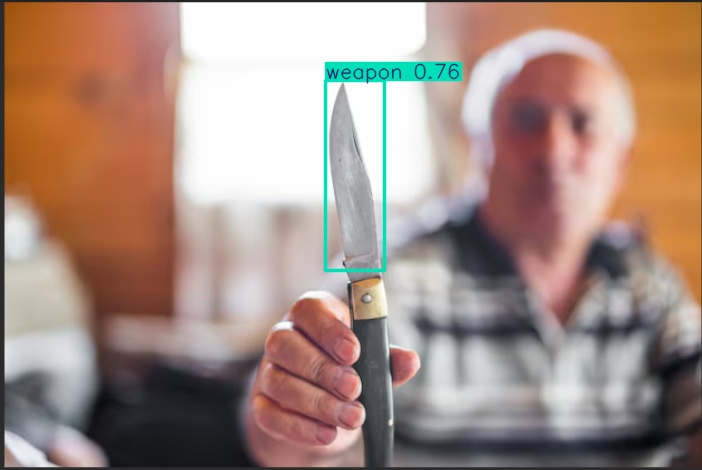

  - weapons_test12.jpg


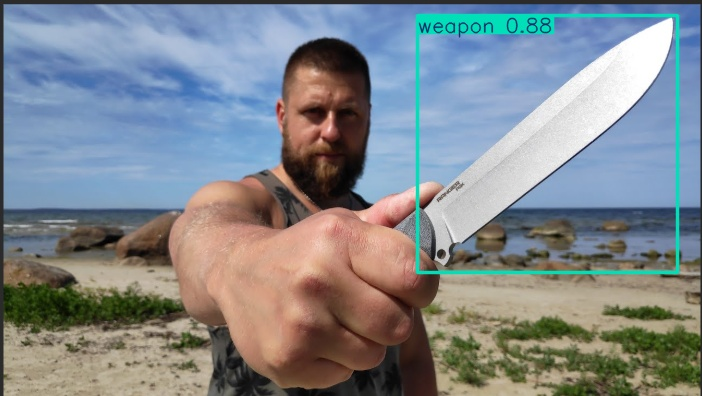

  - otherCoverings_test7.jpg


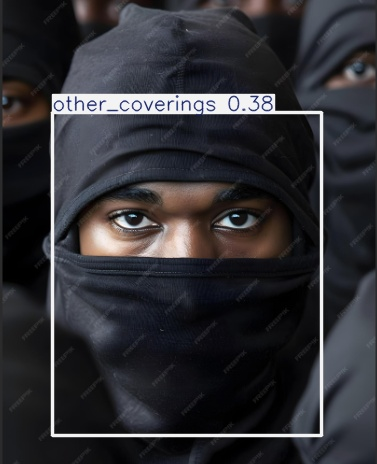

  - weapons_test5.jpg


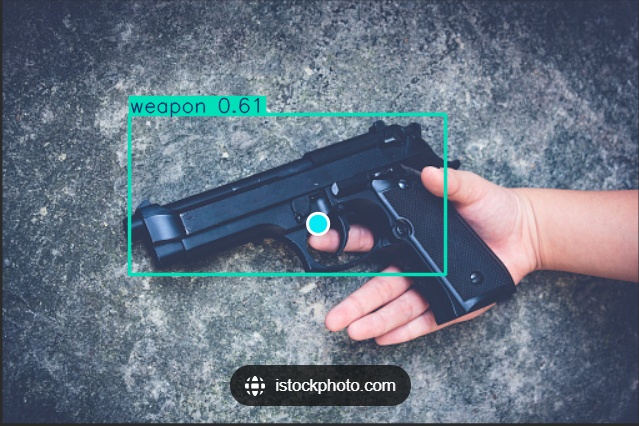

  - weapons_test6.jpg


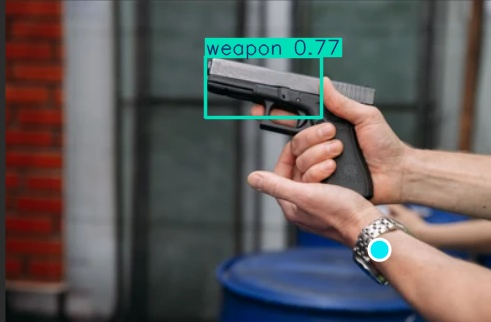

In [4]:
import os
from ultralytics import YOLO
from IPython.display import Image, display
import random # For displaying random sample images

# --- Configuration ---
# Define the path to your trained YOLOv8 model (best.pt).
# This path is based on your previous training output location in Google Drive.
# Ensure this path is correct.
model_path = '/content/drive/MyDrive/yolo_training_results/my_surveillance_model_colab2/weights/best.pt'

# Define the path to the folder containing your test images on Google Drive.
# Make sure your 51 images are inside this folder.
test_images_folder = '/content/drive/MyDrive/test_images/'

# Define the project directory where prediction results will be saved in Google Drive.
# A 'predict' (or 'predict2', etc.) subfolder will be created inside this.
prediction_output_project = '/content/drive/MyDrive/yolo_prediction_results'

# Confidence threshold for detections. Only detections with a confidence score
# above this value will be shown. Adjust as needed (e.g., 0.5 for stricter detections).
confidence_threshold = 0.25

# Specify the device for inference.
# 'cpu' will use the CPU (slower, but avoids GPU limits).
# '0' (or other GPU index) will use the GPU if available (faster).
# If you want to try GPU again, change 'cpu' to None or '0'.
inference_device = 'cpu' # Change to None or '0' to try GPU if available

# --- Load the Model ---
print(f"Attempting to load model from: {model_path}")
try:
    model = YOLO(model_path)
    print("YOLOv8 model loaded successfully!")
except Exception as e:
    print(f"Error loading model: {e}")
    print("Please ensure the 'model_path' is correct and the model file exists.")
    # Exit or prevent further execution if model loading fails
    exit() # This will stop the cell execution in Colab

# --- Run Predictions ---
print(f"Starting predictions on images in: {test_images_folder} using device: {inference_device}...")
try:
    results = model.predict(
        source=test_images_folder,
        save=True,              # Save annotated images
        conf=confidence_threshold, # Set confidence threshold
        project=prediction_output_project, # Save results to this project folder
        device=inference_device # Specify CPU or GPU
    )
    print("\nPredictions completed successfully!")
except Exception as e:
    print(f"An error occurred during prediction: {e}")
    results = None # Ensure results is None if an error occurs

# --- Display Sample Results (Optional) ---
if results:
    # The actual output directory is typically a subfolder like 'predict'
    # within the specified project folder.
    # The `results` object contains the `save_dir` attribute for the exact path.
    output_dir = results[0].save_dir if results and len(results) > 0 else None

    if output_dir and os.path.exists(output_dir):
        print(f"Annotated images saved to: {output_dir}")

        print("\nDisplaying a few random sample annotated images:")
        # Get all image files from the output directory
        saved_files = [f for f in os.listdir(output_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        if len(saved_files) > 0:
            # Display up to 5 random images
            num_to_display = min(5, len(saved_files))
            sample_images_to_display = random.sample(saved_files, num_to_display)

            for img_file in sample_images_to_display:
                image_path = os.path.join(output_dir, img_file)
                print(f"  - {img_file}")
                display(Image(filename=image_path))
        else:
            print("No annotated images found in the output directory to display.")
    else:
        print("Could not determine or find the output directory for annotated images.")
else:
    print("No prediction results were generated to display.")
